In [1]:
import numpy as np
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from utils import *

%load_ext autoreload
%autoreload 2

In [2]:
SAMPLE_NUMBER = 1

In [3]:
PATH       : Path = Path.cwd()/"samples"/str(SAMPLE_NUMBER)  # directory of the images
IMG_FORMAT : str  = "jpg"                                    # e.g. jpg/jpeg/png...
OUTPATH = PATH/'output'
OUTPATH.mkdir(exist_ok=True, parents=True)

if not (PATH/'points.npy').exists(): raise Exception("Points do not exist. Generate them using manual_point_gen.ipynb")
points = np.load(PATH/'points.npy')
if points.shape[1] != 2: raise Exception("Manual stitching if for only 2 images.")
pts1 = points[:, 0, :]
pts2 = points[:, 1, :]

IMAGES = [cv2.imread(str(p)) for p in sorted([x for x in PATH.iterdir() if x.suffix == ".jpg"])]

In [4]:
H = compute_homography(pts1, pts2)
image_homographies_pairs = [(IMAGES[0], np.eye(3)), (IMAGES[1], H)]
transim1, transim2 = warp_images(image_homographies_pairs)

In [5]:
final_image = blend_image(transim1, transim2, method="linear") # <- Change this to change the blending method

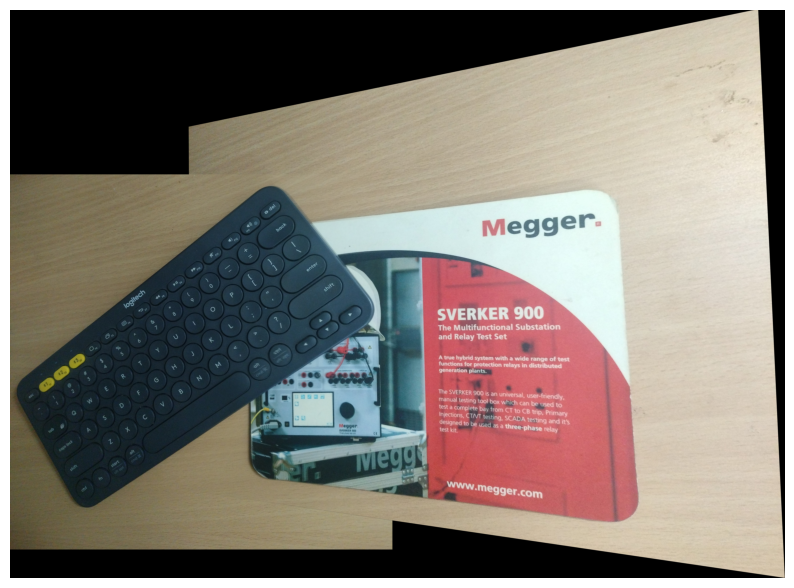

In [6]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB));

In [7]:
cv2.imwrite(str(OUTPATH/'manual.jpg'), final_image)

True